# Book Recommendation system

## Problem Statement:

In the digital era, users are overwhelmed with a vast number of books available across platforms. Finding books that align with individual user interests becomes challenging due to the large volume of choices and varying user preferences.

Traditional recommendation approaches fail to effectively personalize suggestions, especially when dealing with sparse user interactions and diverse reading interests.

Therefore, the objective of this project is to build a Book Recommendation System that analyzes user behavior and book characteristics to provide personalized, relevant, and accurate book recommendations

Primary Objectives:

1.   To analyze user–book interaction data using exploratory data analysis (EDA).
2. To understand reading patterns, rating behavior, and book popularity.
3. To preprocess and clean the dataset to handle missing values, noise, and inconsistencies.
4. To build an efficient book recommendation system using user ratings.
5. To provide personalized book recommendations based on user preferences.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [ ]:
dfbooks = pd.read_csv('Books.csv')
dfratings = pd.read_csv('Ratings.csv')
dfusers = pd.read_csv('Users.csv', engine='python', on_bad_lines='skip')

In [ ]:
# Let's analyse all the datsets one by one

In [ ]:
print('Printing first 5 rows of books dataset');
dfbooks.head()

Printing first 5 rows of books dataset


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print('Printing first 5 rows of ratings dataset');
dfratings.head()

Printing first 5 rows of ratings dataset


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print('Printing first 5 rows of users dataset');
# dfusers.sort_values(by=["User-ID"],ascending = False).head()
dfusers.head()

Printing first 5 rows of users dataset


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print('Printing the shape of books dataset:', dfbooks.shape)
print('Printing the shape of ratings dataset:', dfratings.shape)
print('Printing the shape of users dataset:', dfusers.shape)

Printing the shape of books dataset: (214018, 8)
Printing the shape of ratings dataset: (1149780, 3)
Printing the shape of users dataset: (278858, 3)


In [ ]:
print('Describing the book dataset')
print(dfbooks.describe())

Describing the book dataset
              ISBN    Book-Title      Book-Author  Year-Of-Publication  \
count       214018        214018           214016               214018   
unique      214018        191752            82740                  181   
top     0736906185  Little Women  Agatha Christie                 2002   
freq             1            22              528                13421   

        Publisher                                        Image-URL-S  \
count      214016                                             214018   
unique      13970                                             213807   
top     Harlequin  http://images.amazon.com/images/P/067940337X.0...   
freq         6149                                                  2   

                                              Image-URL-M  \
count                                              214018   
unique                                             213807   
top     http://images.amazon.com/images/P/067940337X.0...

In [ ]:
print('Describing the Users dataset')
print(dfusers.describe())

Describing the Users dataset
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000


In [ ]:
print('Describing the ratings dataset')
print(dfratings.describe())

Describing the ratings dataset
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [ ]:
# Data cleaning and preprocessing

In [ ]:
# Handling Missing values

In [ ]:
print('Checking for missing values in books Datasets');
dfbooks.isnull().sum()

Checking for missing values in books Datasets


,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,1


In [ ]:
print('Checking for missing values in ratings datasets');
dfratings.isnull().sum()

Checking for missing values in ratings datasets


,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
print('Checking for missing values in users datasets');
dfusers.isnull().sum()

Checking for missing values in users datasets


,0
User-ID,0
Location,0
Age,110762


### From the above analysis we can see that there are no missing values in ratings dataset- no neeed to be handled ,
### In books dataset we have a little missing values which needs to be handled
### In the Users dataset we have a huge amount of missing values. We can decide it later in the process that we have to drop the whole column or not

In [ ]:
# For Books dataset
dfbooks=dfbooks.dropna()
# After dropping the missing values
dfbooks.isnull().sum()


# I have dropped the values because the missing value count was very low and also using mode for publishers, book-authors, Image-URL-M will make the data less accurate

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [ ]:
# For now we can just pass median into missing age values
dfusers['Age'].fillna(dfusers['Age'].median(), inplace=True)
dfusers.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [ ]:
# Checking for duplicates

dfbooks.duplicated().sum()

np.int64(0)

In [ ]:
dfusers.duplicated().sum()

np.int64(0)

In [ ]:
dfratings.duplicated().sum()

np.int64(0)

### As there are not duplicates we don't have to drop any row

# Visulizations

## Uni-Varient analysis

### Univariate Analysis focuses on understanding the behavior of a single feature without considering relationships with other features.

<function matplotlib.pyplot.show(close=None, block=None)>

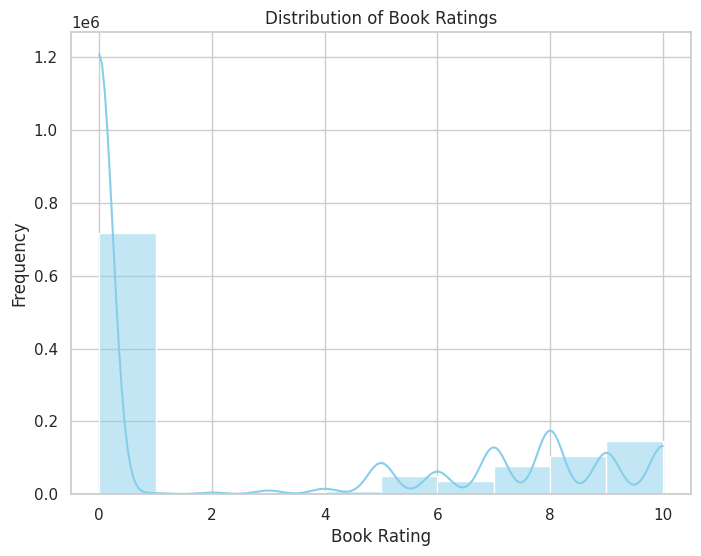

In [ ]:
# Book ratings distribution

plt.figure(figsize=(8,6 ))
sns.histplot(dfratings['Book-Rating'],bins=10,kde=True,color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show

#The rating distribution shows a strong dominance of zero ratings, indicating implicit user feedback where books were interacted with but not explicitly rated. Explicit ratings are comparatively fewer and are positively skewed toward higher values, suggesting that users are more likely to rate books they enjoyed. This highlights data sparsity and influenced our decision to handle implicit and explicit feedback separately in the recommendation system

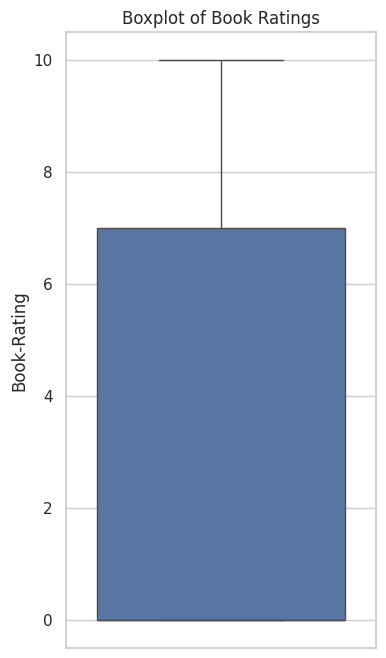

In [ ]:
# Boxplot for Book Ratings

plt.figure(figsize=(4,8))
sns.boxplot(y=dfratings['Book-Rating'])
plt.title("Boxplot of Book Ratings")
plt.show()


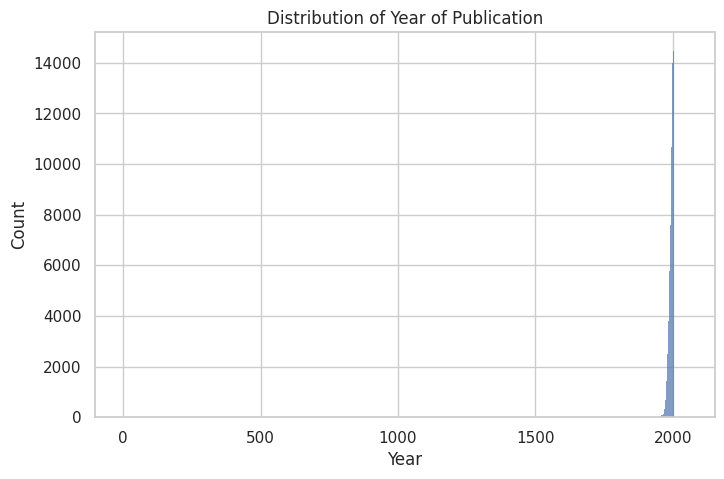

In [ ]:
# Year of Publication
plt.figure(figsize=(8,5))
sns.histplot(dfbooks['Year-Of-Publication'], bins=30)
plt.title("Distribution of Year of Publication")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [ ]:
dfbooks['Year-Of-Publication'] = pd.to_numeric(
    dfbooks['Year-Of-Publication'],
    errors='coerce'
)

dfbooks1 = dfbooks[(dfbooks['Year-Of-Publication'] >= 1900) &
              (dfbooks['Year-Of-Publication'] <= 2025)]


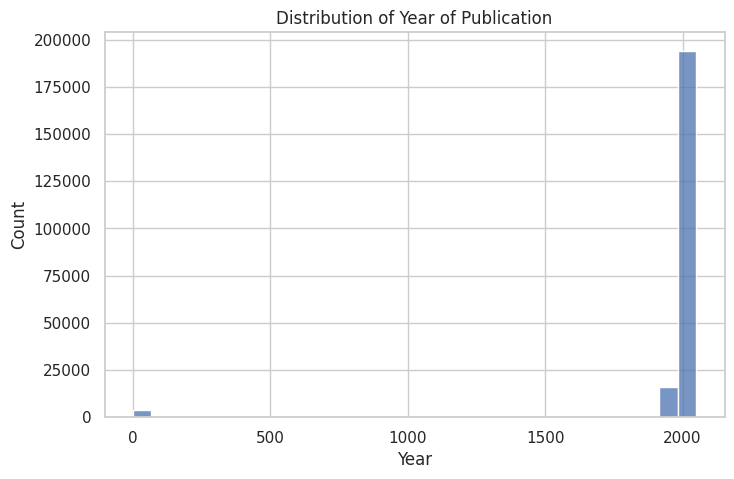

In [ ]:
# Year of Publication
plt.figure(figsize=(8,5))
sns.histplot(dfbooks['Year-Of-Publication'], bins=30)
plt.title("Distribution of Year of Publication")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


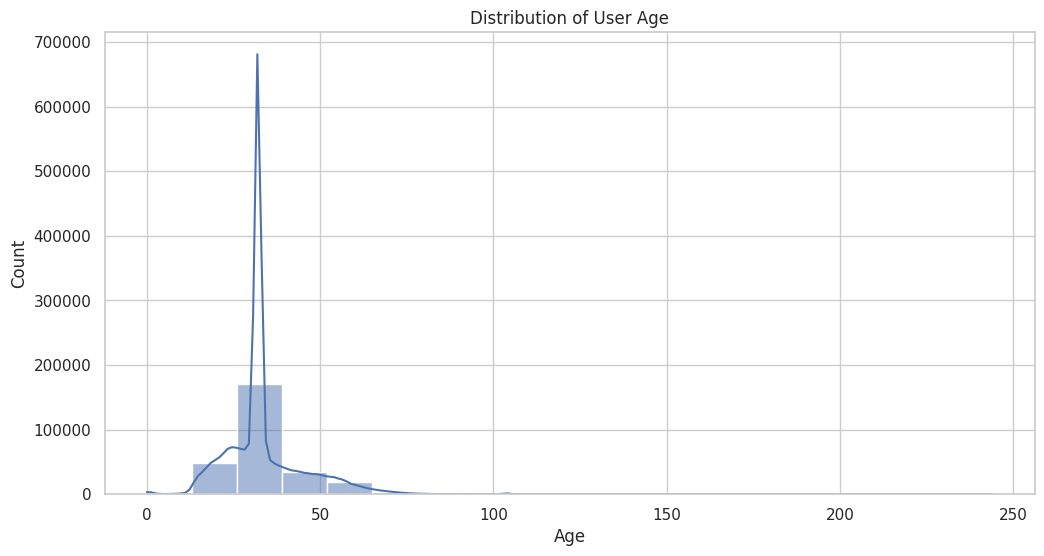

In [ ]:
#User Age Distribution

plt.figure(figsize=(12,6))
sns.histplot(dfusers['Age'].dropna(), bins=10,binrange=(0,130), kde=True)
#plt.xticks(range(0,110,10))
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


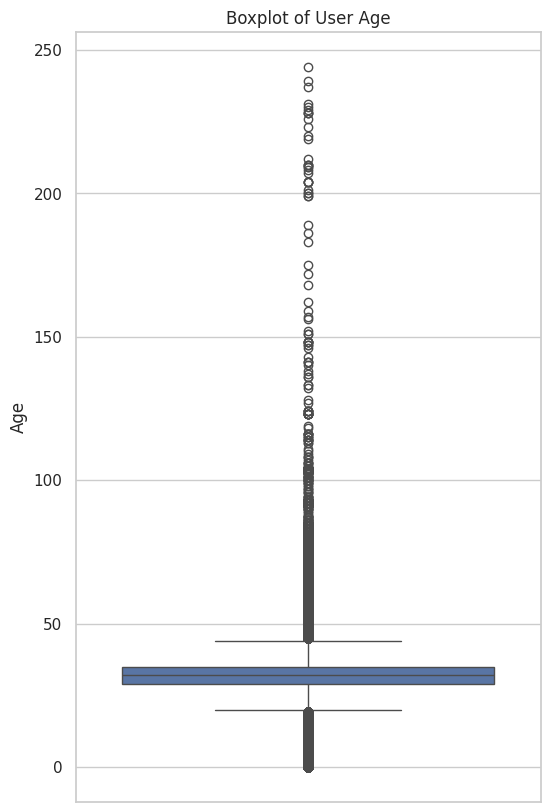

In [ ]:
# Box plot of User Age
plt.figure(figsize=(6,10))
sns.boxplot(y=dfusers['Age'])
plt.title("Boxplot of User Age")
plt.show()


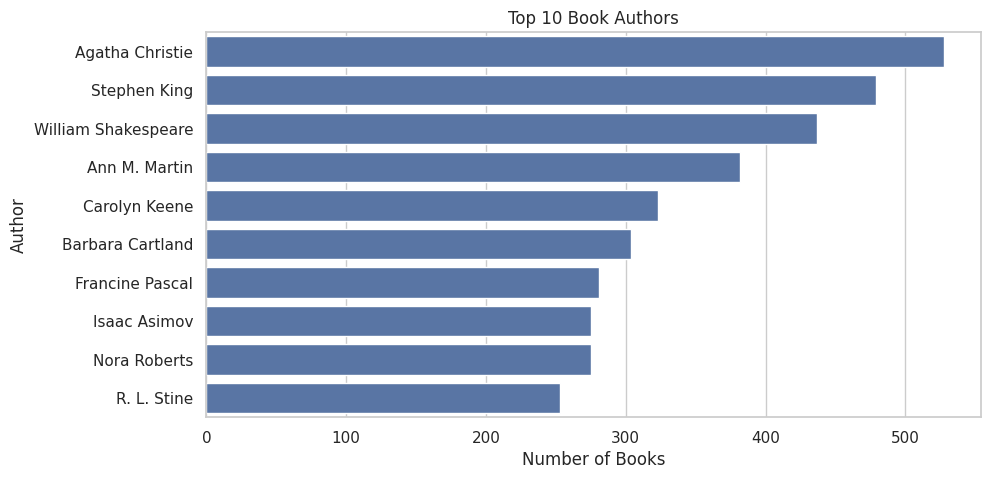

In [ ]:
# TOP 10 Authors
top_authors = dfbooks['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Book Authors")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


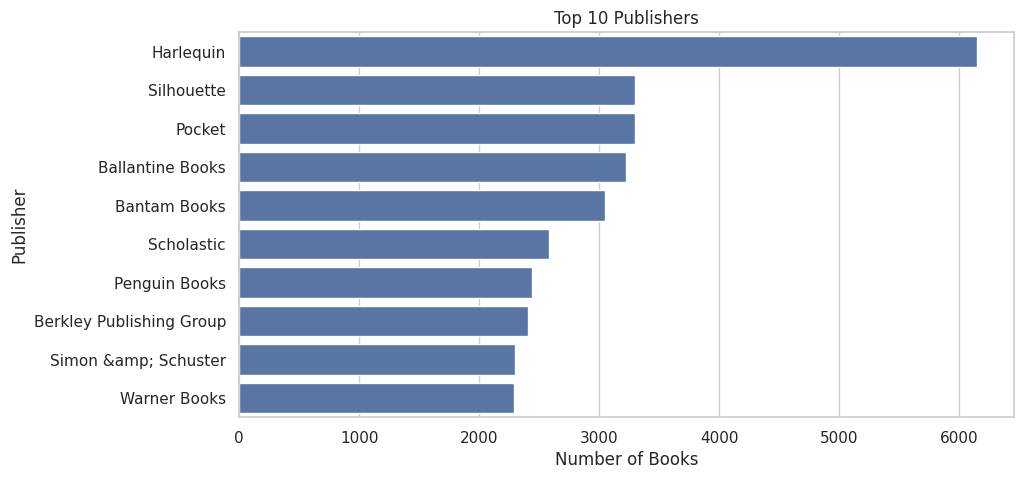

In [ ]:
# Top 10 publishers
top_publishers = dfbooks['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


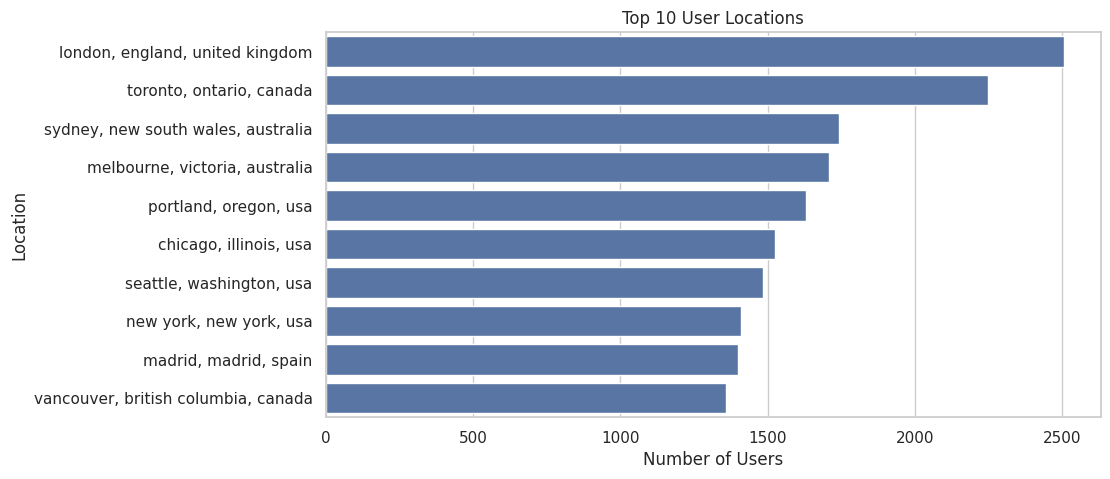

In [ ]:
# TOP 10 USER LOCATIONS
top_locations = dfusers['Location'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 User Locations")
plt.xlabel("Number of Users")
plt.ylabel("Location")
plt.show()


# Bi_varient analysis:
# Bivariate analysis was performed to study relationships between user age, book ratings, and publication year, revealing weak correlations and justifying collaborative filtering


In [ ]:

# Merge ratings with books
df = dfratings.merge(dfbooks1, on='ISBN', how='inner')

# Merge with users
df = df.merge(dfusers, on='User-ID', how='inner')

# Convert Age to numeric (important)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove invalid ages
df = df[(df['Age'] >= 10) & (df['Age'] <= 90)]

# Keep only required columns
df_pair = df[['Book-Rating', 'Year-Of-Publication', 'Age']].dropna()


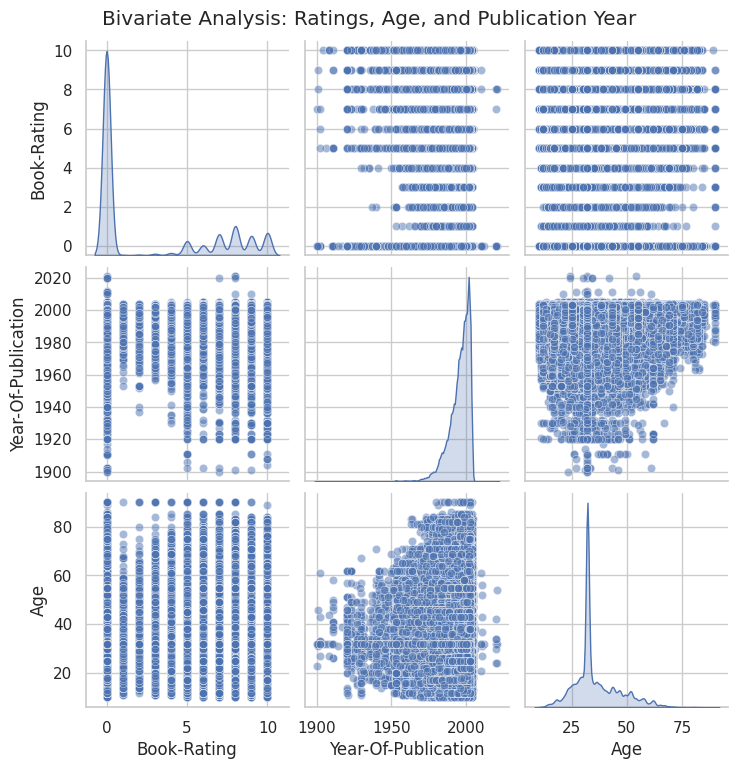

In [ ]:
sns.pairplot(
    df_pair,
    diag_kind='kde',
    corner=False,
    plot_kws={'alpha': 0.5}
)

plt.suptitle("Bivariate Analysis: Ratings, Age, and Publication Year", y=1.02)
plt.show()


In [ ]:
# Multivarient analysis

In [ ]:
#Multivariate analysis studies the interaction between three or more variables simultaneously to understand combined effects and complex relationships.

In [ ]:
df_multi = df[['Book-Rating', 'Year-Of-Publication', 'Age']].dropna()


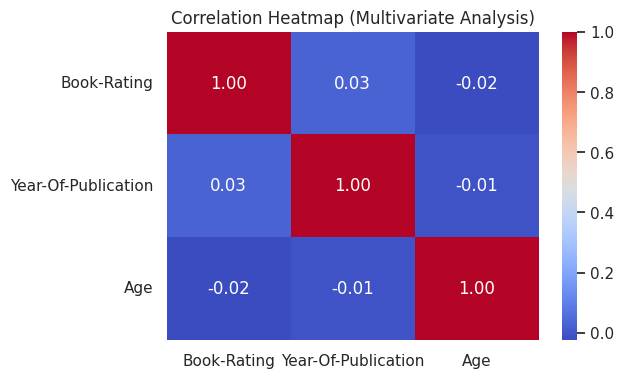

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df_multi.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Multivariate Analysis)")
plt.show()


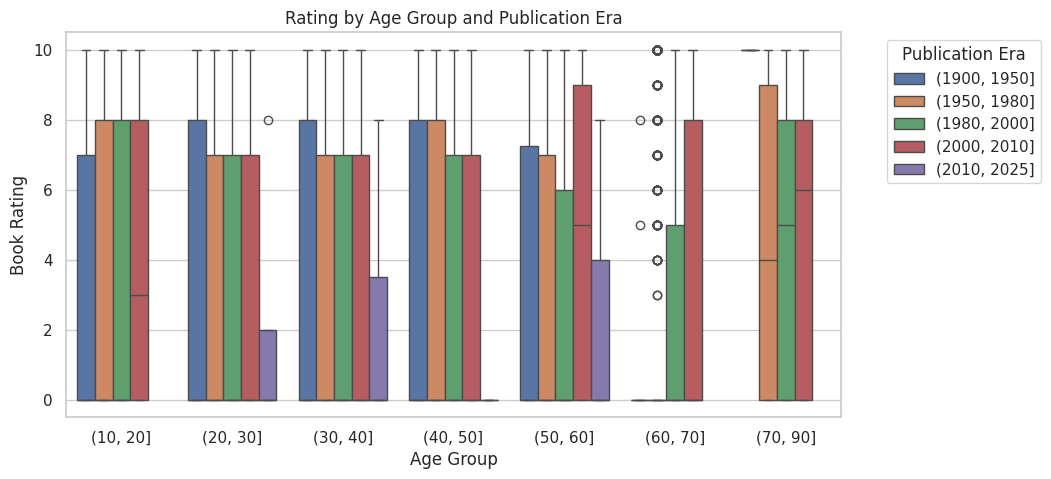

In [ ]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[10,20,30,40,50,60,70,90]
)

df['PubEra'] = pd.cut(
    df['Year-Of-Publication'],
    bins=[1900,1950,1980,2000,2010,2025]
)

plt.figure(figsize=(10,5))
sns.boxplot(
    x='AgeGroup',
    y='Book-Rating',
    hue='PubEra',
    data=df
)
plt.title("Rating by Age Group and Publication Era")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.legend(title="Publication Era", bbox_to_anchor=(1.05, 1))
plt.show()


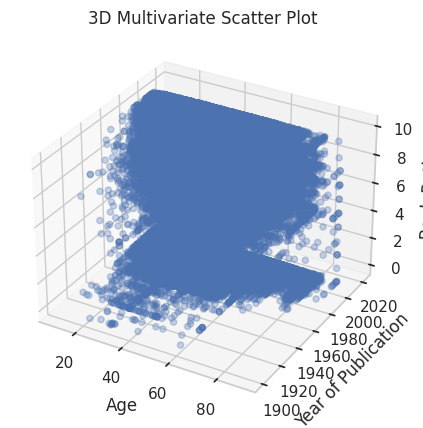

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_multi['Age'],
    df_multi['Year-Of-Publication'],
    df_multi['Book-Rating'],
    alpha=0.3
)

ax.set_xlabel("Age")
ax.set_ylabel("Year of Publication")
ax.set_zlabel("Book Rating")
ax.set_title("3D Multivariate Scatter Plot")

plt.show()


# Co-relation matrix

In [ ]:
# Merge datasets
df = dfratings.merge(dfbooks1, on='ISBN', how='inner')
df = df.merge(dfusers, on='User-ID', how='inner')

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Select numerical columns only
df_col = df[['Book-Rating', 'Year-Of-Publication', 'Age']].dropna()

df_col.head()


,Book-Rating,Year-Of-Publication,Age
0,0,2002,32.0
1,0,1996,16.0
2,0,1998,37.0
3,7,2001,32.0
4,0,1996,32.0


In [ ]:
corr_matrix = df_col.corr()
corr_matrix


,Book-Rating,Year-Of-Publication,Age
Book-Rating,1.000000,0.032003,-0.024702
Year-Of-Publication,0.032003,1.000000,-0.000795
Age,-0.024702,-0.000795,1.000000


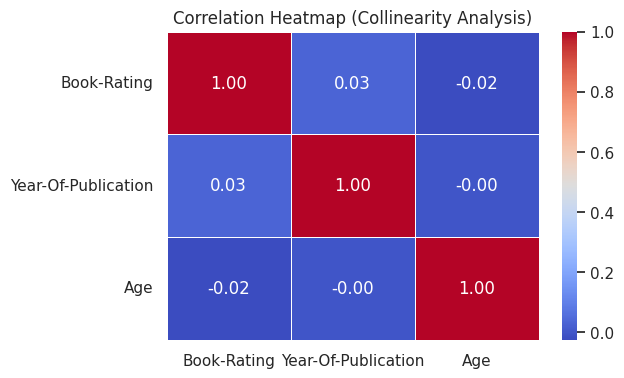

In [ ]:
# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Collinearity Analysis)")
plt.show()


In [ ]:
# Checking VIF factors

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i)
        for i in range(df.shape[1])
    ]
    return vif_data


In [ ]:
df = dfratings.merge(dfbooks1, on='ISBN', how='inner')
df = df.merge(dfusers, on='User-ID', how='inner')

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df_multi = df[['Book-Rating', 'Year-Of-Publication', 'Age']].dropna()


In [ ]:
vif_df = calculate_vif(df_multi)
vif_df


,Feature,VIF
0,Book-Rating,1.549122
1,Year-Of-Publication,10.218825
2,Age,9.562556


In [ ]:
#df_books = df_multi.drop(columns=['Year-Of-Publication'])
#calculate_vif(df_books)


# Outliers detection

# Task:

> Add blockquote


## To detect the outliers present in the data

# Reasoning:
## We detect outliers in data cleaning to remove extreme values that can distort analysis and negatively impact the accuracy of machine learning models.

In [ ]:
# Merge datasets
df = dfratings.merge(dfbooks1, on='ISBN', how='inner')
df = df.merge(dfusers, on='User-ID', how='inner')

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Select numeric columns
df_raw = df[['Book-Rating', 'Year-Of-Publication', 'Age']].dropna()


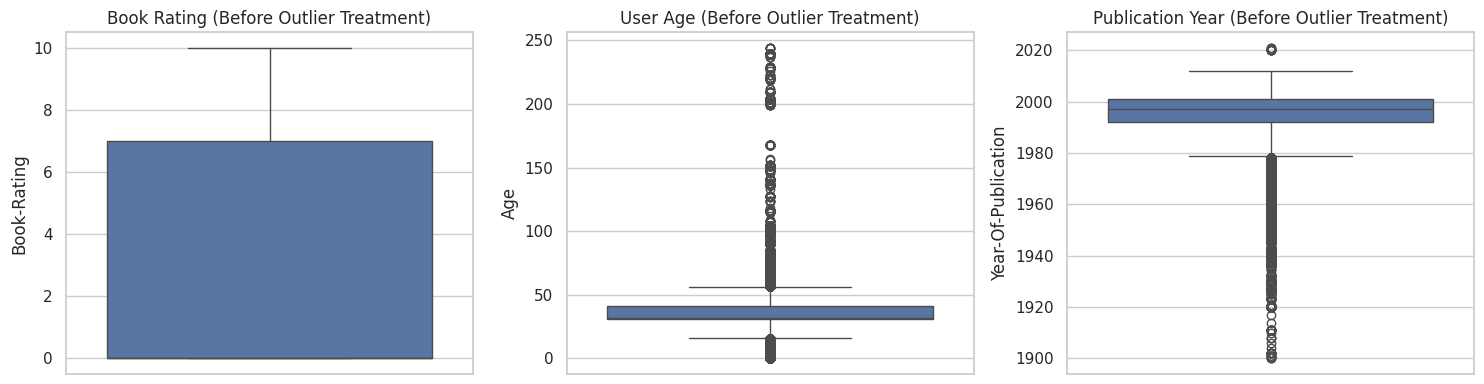

In [ ]:
plt.figure(figsize=(15,4))

# Book Rating
plt.subplot(1,3,1)
sns.boxplot(y=df_raw['Book-Rating'])
plt.title("Book Rating (Before Outlier Treatment)")

# Age
plt.subplot(1,3,2)
sns.boxplot(y=df_raw['Age'])
plt.title("User Age (Before Outlier Treatment)")

# Year of Publication
plt.subplot(1,3,3)
sns.boxplot(y=df_raw['Year-Of-Publication'])
plt.title("Publication Year (Before Outlier Treatment)")

plt.tight_layout()
plt.show()


In [ ]:
def iqr_cap(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower, lower,
                           np.where(df[column] > upper, upper, df[column]))
    return df

df_clean = df_raw.copy()

for col in df_clean.columns:
    df_clean = iqr_cap(df_clean, col)


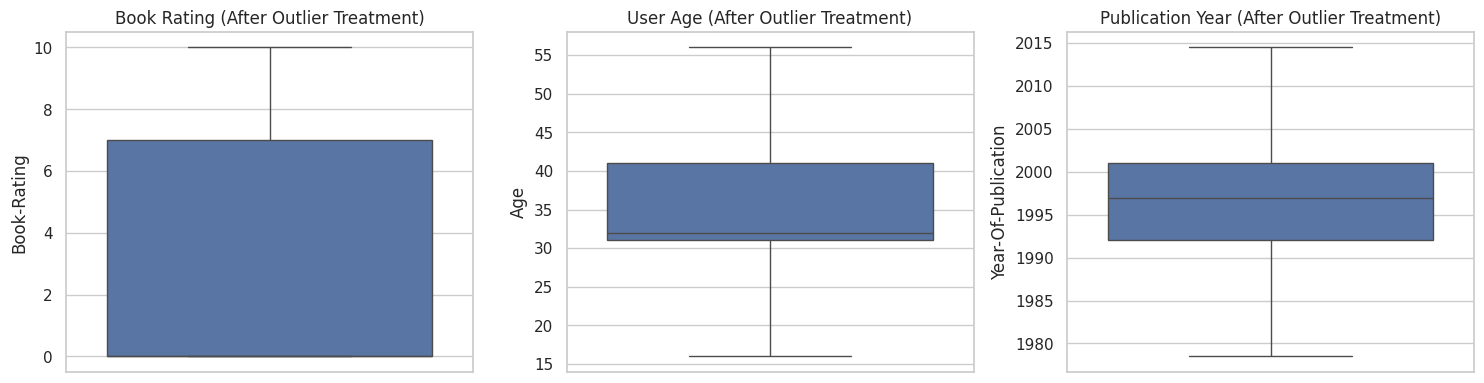

In [ ]:
plt.figure(figsize=(15,4))

# Book Rating
plt.subplot(1,3,1)
sns.boxplot(y=df_clean['Book-Rating'])
plt.title("Book Rating (After Outlier Treatment)")

# Age
plt.subplot(1,3,2)
sns.boxplot(y=df_clean['Age'])
plt.title("User Age (After Outlier Treatment)")

# Year of Publication
plt.subplot(1,3,3)
sns.boxplot(y=df_clean['Year-Of-Publication'])
plt.title("Publication Year (After Outlier Treatment)")

plt.tight_layout()
plt.show()


In [ ]:
# For recommendation I want Book-names, user-id, ratings in a single table so I'll first scale the data and bring them into a dataframe/new table

In [ ]:
print(dfbooks.columns)
print(dfratings.columns)
print(dfusers.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [ ]:
ratings_books = dfratings.merge(dfbooks[['ISBN','Book-Title']],on='ISBN',how='inner')

In [ ]:
final_dataset = ratings_books.merge(dfusers[['User-ID']],on='User-ID',how='inner')

In [ ]:
final_dataset.head()


,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276727,0446520802,0,The Notebook
2,276733,2080674722,0,Les Particules Elementaires
3,276744,038550120X,7,A Painted House
4,276746,0425115801,0,Lightning


In [ ]:
final_dataset.rename(columns={'Book-Title': 'BookTitle'},inplace=True)
final_dataset.rename(columns={'Book-Rating': 'Bookratings'},inplace=True)
final_dataset.rename(columns={'User-ID': 'UserID'},inplace=True)

In [ ]:
len(final_dataset.UserID.unique())

89846

In [ ]:
len(final_dataset.Bookratings.unique())

11

In [ ]:
pd.DataFrame(final_dataset.BookTitle.unique())

,0
0,Flesh Tones: A Novel
1,The Notebook
2,Les Particules Elementaires
3,A Painted House
4,Lightning
...,...
191537,Death Crosses the Border
191538,Jazz Funeral: A Skip Langdon Novel
191539,Triplet Trouble and the Class Trip (Triplet Tr...
191540,A Desert of Pure Feeling (Vintage Contemporaries)


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965700 entries, 0 to 965699
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserID       965700 non-null  int64 
 1   ISBN         965700 non-null  object
 2   Bookratings  965700 non-null  int64 
 3   BookTitle    965700 non-null  object
dtypes: int64(2), object(2)
memory usage: 29.5+ MB


# Model Development (Recommendation models)

### User to User similarity using csr_matrix and KNN
#### User-to-User similarity is a collaborative filtering technique where users are represented as rating vectors. We convert the user-item rating matrix into a sparse CSR matrix to handle sparsity efficiently. Using KNN with cosine similarity, we find users with similar rating patterns and recommend books based on what similar users liked.

In [ ]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
ratings = dfratings[['User-ID', 'ISBN', 'Book-Rating']]


In [ ]:
# Remove zero ratings (implicit feedback not needed here)
ratings = ratings[ratings['Book-Rating'] > 0]

# Convert datatypes
ratings['User-ID'] = ratings['User-ID'].astype(int)
ratings['Book-Rating'] = ratings['Book-Rating'].astype(float)


In [ ]:
# Active users
user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 50].index

# Popular books
book_counts = ratings['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 50].index

ratings = ratings[
    ratings['User-ID'].isin(active_users) &
    ratings['ISBN'].isin(popular_books)
]


In [ ]:
train, test = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)


In [ ]:
user_item_train = train.pivot_table(
    index='User-ID',
    columns='ISBN',
    values='Book-Rating'
)

user_item_train = user_item_train.fillna(0)

# Convert to sparse matrix
train_sparse = csr_matrix(user_item_train.values)


In [ ]:
# User mean ratings
user_means = user_item_train.replace(0, np.nan).mean(axis=1)

# Mean-centered matrix
user_item_centered = user_item_train.sub(user_means, axis=0).fillna(0)

# Sparse
train_sparse_centered = csr_matrix(user_item_centered.values)


In [ ]:
model = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=20,
    n_jobs=-1
)

model.fit(train_sparse)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def predict_rating_centered(user_id, book_isbn, k=5):
    if user_id not in user_item_train.index or book_isbn not in user_item_train.columns:
        return np.nan

    user_idx = user_item_train.index.get_loc(user_id)

    distances, indices = model.kneighbors(
        user_item_centered.iloc[user_idx].values.reshape(1, -1),
        n_neighbors=k+1
    )

    sim_users = indices.flatten()[1:]
    sim_scores = 1 - distances.flatten()[1:]

    ratings = user_item_train.iloc[sim_users][book_isbn]
    neighbor_means = user_means.iloc[sim_users]

    adjusted = ratings - neighbor_means

    if adjusted.isnull().all():
        return np.nan

    pred = user_means.iloc[user_idx] + np.dot(sim_scores, adjusted.fillna(0)) / sim_scores.sum()
    return np.clip(pred, 1, 10)


In [ ]:
def precision_at_k(user_id, k=5, threshold=7):
    if user_id not in user_item_train.index:
        return None

    user_idx = user_item_train.index.get_loc(user_id)

    distances, indices = model.kneighbors(
        user_item_train.iloc[user_idx].values.reshape(1, -1),
        n_neighbors=k+1
    )

    sim_users = indices.flatten()[1:]

    recommended_books = user_item_train.iloc[sim_users].mean(axis=0)
    recommended_books = recommended_books.sort_values(ascending=False).head(k)

    relevant = test[
        (test['User-ID'] == user_id) &
        (test['Book-Rating'] >= threshold)
    ]['ISBN'].values

    if len(relevant) == 0:
        return None

    hits = len(set(recommended_books.index) & set(relevant))
    return hits / k


In [ ]:
predictions = []
actuals = []

for row in test.itertuples():
    pred = predict_rating_centered(row._1, row.ISBN)
    if not np.isnan(pred):
        predictions.append(pred)
        actuals.append(row._3)

rmse = np.sqrt(mean_squared_error(actuals, predictions))
print("RMSE:", rmse)


RMSE: 6.994539424991414


In [ ]:
precisions = []

for user in test['User-ID'].unique()[:100]:  # limit for speed
    p = precision_at_k(user, k=5)
    if p is not None:
        precisions.append(p)

print("Precision@5:", np.mean(precisions)*100)


Precision@5: 1.6494845360824744


In [ ]:
user_id = user_item_train.index[0]   # safe user


In [ ]:
def get_top_k_isbns(user_id, k=5):
    if user_id not in user_item_train.index:
        return []

    user_idx = user_item_train.index.get_loc(user_id)

    # SAFE neighbor count
    n_neighbors = min(20, user_item_train.shape[0])

    distances, indices = model.kneighbors(
        user_item_train.iloc[user_idx].values.reshape(1, -1),
        n_neighbors=n_neighbors
    )

    sim_users = indices.flatten()[1:]
    sim_scores = 1 - distances.flatten()[1:]

    scores = np.zeros(user_item_train.shape[1])

    for idx, score in zip(sim_users, sim_scores):
        scores += user_item_train.iloc[idx].values * score

    # Remove already rated books
    user_rated = user_item_train.iloc[user_idx].values > 0
    scores[user_rated] = 0

    top_indices = np.argsort(scores)[-k:][::-1]
    return user_item_train.columns[top_indices]


In [ ]:
isbn_to_title = dict(zip(dfbooks['ISBN'], dfbooks['Book-Title']))

In [ ]:
user_id = user_item_train.index[0]

top_5_isbns = get_top_k_isbns(user_id, k=5)

print("Top 5 Recommended Books:\n")

for i, isbn in enumerate(top_5_isbns, 1):
    print(f"{i}. {isbn_to_title.get(isbn, 'Unknown Title')}")


Top 5 Recommended Books:

1. Harry Potter and the Prisoner of Azkaban (Book 3)
2. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
3. Harry Potter and the Chamber of Secrets (Book 2)
4. Harry Potter and the Sorcerer's Stone (Book 1)
5. Harry Potter and the Prisoner of Azkaban (Book 3)


# Item to Item based Recommendation

In [ ]:
user_item = ratings.pivot_table(
    index='User-ID',
    columns='ISBN',
    values='Book-Rating'
).fillna(0)


In [ ]:
item_user = user_item.T
item_sparse = csr_matrix(item_user.values)


In [ ]:
item_model = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=20,
    n_jobs=-1
)

item_model.fit(item_sparse)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def recommend_books_item_item(user_id, k=5, top_n=5):
    if user_id not in user_item.index:
        return []

    user_ratings = user_item.loc[user_id]
    liked_books = user_ratings[user_ratings > 0].index

    scores = np.zeros(user_item.shape[1])

    for book in liked_books:
        book_idx = item_user.index.get_loc(book)

        n_neighbors = min(k+1, item_user.shape[0])

        distances, indices = item_model.kneighbors(
            item_user.iloc[book_idx].values.reshape(1, -1),
            n_neighbors=n_neighbors
        )

        sim_books = indices.flatten()[1:]
        sim_scores = 1 - distances.flatten()[1:]

        scores[sim_books] += sim_scores * user_ratings[book]

    # Remove already rated books
    scores[user_ratings.values > 0] = 0

    top_indices = np.argsort(scores)[-top_n:][::-1]
    return user_item.columns[top_indices]


In [ ]:
isbn_to_title = dict(zip(dfbooks['ISBN'], dfbooks['Book-Title']))


In [ ]:
user_id = user_item.index[10]   # safe user

top_books = recommend_books_item_item(user_id)

print("Top 5 Recommended Books (Item–Item CF):\n")

for i, isbn in enumerate(top_books, 1):
    print(f"{i}. {isbn_to_title.get(isbn, 'Unknown Title')}")


Top 5 Recommended Books (Item–Item CF):

1. The Simple Truth
2. The Testament
3. The Beach House
4. Flesh and Blood
5. Free


In [ ]:
def predict_item_item(user_id, book):
    if user_id not in user_item.index or book not in item_user.index:
        return np.nan

    user_ratings = user_item.loc[user_id]
    rated_books = user_ratings[user_ratings > 0]

    if rated_books.empty:
        return np.nan

    book_idx = item_user.index.get_loc(book)

    distances, indices = item_model.kneighbors(
        item_user.iloc[book_idx].values.reshape(1, -1),
        n_neighbors=min(10, item_user.shape[0])
    )

    sim_books_idx = indices.flatten()[1:]
    sim_scores = 1 - distances.flatten()[1:]

    sim_books_isbn = item_user.index[sim_books_idx]

    # Keep only books user has rated
    common_books = sim_books_isbn.intersection(rated_books.index)

    if len(common_books) == 0:
        return np.nan

    ratings = rated_books.loc[common_books].values
    sims = sim_scores[:len(common_books)]

    return np.dot(sims, ratings) / sims.sum()


In [ ]:
def get_top_k_item_item(user_id, k=5):
    if user_id not in user_item.index:
        return []

    user_ratings = user_item.loc[user_id]
    unseen_books = user_ratings[user_ratings == 0].index

    preds = []

    for book in unseen_books:
        pred = predict_item_item(user_id, book)
        if not np.isnan(pred):
            preds.append((book, pred))

    if len(preds) == 0:
        return []

    preds.sort(key=lambda x: x[1], reverse=True)
    return [book for book, _ in preds[:k]]


In [ ]:
def precision_at_k_item_item(user_id, k=5, threshold=6):
    recommended_books = get_top_k_item_item(user_id, k)

    if len(recommended_books) == 0:
        return None

    relevant_books = test[
        (test['User-ID'] == user_id) &
        (test['Book-Rating'] >= threshold)
    ]['ISBN'].values

    if len(relevant_books) == 0:
        return None

    hits = len(set(recommended_books) & set(relevant_books))
    return hits / k


In [ ]:
# precisions = []

# for user in test['User-ID'].unique()[:100]:
#     p = precision_at_k_item_item(user, k=5)
#     if p is not None:
#         precisions.append(p)

# print("Item–Item Precision@5:", np.mean(precisions) * 100)


# SVD (matrix factorization)

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
# User mean
user_means = user_item_train.replace(0, np.nan).mean(axis=1)

# Mean-centered matrix
user_item_centered = user_item_train.sub(user_means, axis=0).fillna(0)

# Sparse
train_sparse = csr_matrix(user_item_centered.values)


In [ ]:
valid_test = test[
    test['User-ID'].isin(user_item_train.index) &
    test['ISBN'].isin(user_item_train.columns)
]


In [ ]:
svd = TruncatedSVD(
    n_components=50,
    random_state=42
)

user_factors = svd.fit_transform(train_sparse)
item_factors = svd.components_


In [ ]:
def predict_svd(user_id, book):
    if user_id not in user_item_train.index or book not in user_item_train.columns:
        return np.nan

    u_idx = user_item_train.index.get_loc(user_id)
    b_idx = user_item_train.columns.get_loc(book)

    pred = user_means.iloc[u_idx] + np.dot(
        user_factors[u_idx],
        item_factors[:, b_idx]
    )

    return np.clip(pred, 1, 10)


In [ ]:
preds = []
actuals = []

for row in valid_test.itertuples():
    p = predict_svd(row._1, row.ISBN)
    if not np.isnan(p):
        preds.append(p)
        actuals.append(row._3)

rmse = np.sqrt(mean_squared_error(actuals, preds))
print("SVD RMSE (filtered):", rmse)


SVD RMSE (filtered): 7.034688135663984


In [ ]:
def top_k_svd(user_id, k=5):
    if user_id not in user_item_train.index:
        return []

    u_idx = user_item_train.index.get_loc(user_id)
    scores = user_factors[u_idx] @ item_factors

    user_rated = user_item_train.iloc[u_idx].values > 0
    scores[user_rated] = -np.inf

    top_indices = np.argsort(scores)[-k:][::-1]
    return user_item_train.columns[top_indices]


In [ ]:
def precision_at_k_svd(user_id, k=5, threshold=6):
    recommended = top_k_svd(user_id, k)

    if len(recommended) == 0:
        return None

    relevant = test[
        (test['User-ID'] == user_id) &
        (test['Book-Rating'] >= threshold)
    ]['ISBN'].values

    if len(relevant) == 0:
        return None

    hits = len(set(recommended) & set(relevant))
    return hits / k


In [ ]:
precisions = []

for user in test['User-ID'].unique()[:100]:
    p = precision_at_k_svd(user, k=5)
    if p is not None:
        precisions.append(p)

print("SVD Precision@5:", np.mean(precisions) * 100)


SVD Precision@5: 5.979381443298968


In [ ]:
def print_top_5_svd(user_id):
    recommended = top_k_svd(user_id, k=5)

    if len(recommended) == 0:
        print("No recommendations available for this user.")
        return

    print(f"\nTop 5 Recommended Books for User {user_id} (SVD):\n")

    for i, isbn in enumerate(recommended, 1):
        print(f"{i}. {isbn_to_title.get(isbn, 'Unknown Title')}")


In [ ]:
sample_user = user_item_train.index[0]
print_top_5_svd(sample_user)



Top 5 Recommended Books for User 254 (SVD):

1. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
2. Harry Potter and the Sorcerer's Stone (Book 1)
3. Harry Potter and the Prisoner of Azkaban (Book 3)
4. Anne Frank: The Diary of a Young Girl
5. Watership Down


# Neural collabirative filtering

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Encode User-ID and ISBN
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

ratings['user_enc'] = user_encoder.fit_transform(ratings['User-ID'])
ratings['item_enc'] = item_encoder.fit_transform(ratings['ISBN'])

num_users = ratings['user_enc'].nunique()
num_items = ratings['item_enc'].nunique()


In [ ]:
X = ratings[['user_enc', 'item_enc']]
y = ratings['Book-Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model


In [ ]:
embedding_dim = 50

# Inputs
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embeddings
user_embedding = Embedding(num_users, embedding_dim)(user_input)
item_embedding = Embedding(num_items, embedding_dim)(item_input)

user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate
concat = Concatenate()([user_vec, item_vec])

# MLP
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
dense = Dense(32, activation='relu')(dense)

# Output
output = Dense(1)(dense)

# Model
ncf_model = Model([user_input, item_input], output)


In [ ]:
ncf_model.compile(
    optimizer='adam',
    loss='mse'
)

ncf_model.fit(
    [X_train['user_enc'], X_train['item_enc']],
    y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 57.8775 - val_loss: 8.6307
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3732 - val_loss: 2.7311
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1078 - val_loss: 2.5428
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8537 - val_loss: 2.5319
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8235 - val_loss: 2.5429
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8258 - val_loss: 2.5452
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8577 - val_loss: 2.5320
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7869 - val_loss: 2.5361
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7871 - val_loss: 2.5502
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7746 - val_loss: 2.5362


In [ ]:
from sklearn.metrics import mean_squared_error

preds = ncf_model.predict(
    [X_test['user_enc'], X_test['item_enc']],
    verbose=0
).flatten()

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("NCF RMSE:", rmse)



NCF RMSE: 1.5634248072728612


In [ ]:
def top_k_books_ncf(user_id, k=5):
    if user_id not in ratings['User-ID'].values:
        return []

    user_enc = user_encoder.transform([user_id])[0]

    # Prepare inputs
    user_input = np.full((num_items, 1), user_enc)
    item_input = np.arange(num_items).reshape(-1, 1)

    # Predict
    preds = ncf_model.predict(
        [user_input, item_input],
        batch_size=1024,
        verbose=0
    ).flatten()

    # Remove already-rated items
    rated_items = ratings[ratings['User-ID'] == user_id]['item_enc'].values
    preds[rated_items] = -np.inf

    # Top-K
    top_indices = np.argsort(preds)[-k:][::-1]
    top_isbns = item_encoder.inverse_transform(top_indices)

    return top_isbns


In [ ]:
user_id = ratings['User-ID'].iloc[0]

top_books = top_k_books_ncf(user_id)

print("Top 5 Recommended Books (NCF):\n")
for i, isbn in enumerate(top_books, 1):
    print(f"{i}. {isbn_to_title.get(isbn, 'Unknown Title')}")


Top 5 Recommended Books (NCF):

1. Unknown Title
2. The Return of the King (The Lord of the Rings, Part 3)
3. The Curious Incident of the Dog in the Night-Time (Vintage Contemporaries)
4. Lolita (Vintage International)
5. Where the Red Fern Grows


In [ ]:
def precision_at_k_ncf(user_id, k=5, threshold=6):
    recommended_books = top_k_books_ncf(user_id, k)

    if len(recommended_books) == 0:
        return None

    relevant_books = test[
        (test['User-ID'] == user_id) &
        (test['Book-Rating'] >= threshold)
    ]['ISBN'].values

    if len(relevant_books) == 0:
        return None

    hits = len(set(recommended_books) & set(relevant_books))
    return hits / k


In [ ]:
precisions = []

for user in test['User-ID'].unique()[:100]:  # limit for speed
    p = precision_at_k_ncf(user, k=5)
    if p is not None:
        precisions.append(p)

print("NCF Precision@5:", np.mean(precisions) * 100)


NCF Precision@5: 0.0


# Auto encoder based recommender

In [ ]:
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd


In [ ]:
user_item = ratings.pivot_table(
    index='User-ID',
    columns='ISBN',
    values='Book-Rating'
).fillna(0)

user_item_matrix = user_item.values
num_users, num_items = user_item_matrix.shape


In [ ]:
user_item = ratings.pivot_table(
    index='User-ID',
    columns='ISBN',
    values='Book-Rating'
).fillna(0)

user_item_matrix = user_item.values
num_users, num_items = user_item_matrix.shape


In [ ]:
from sklearn.model_selection import train_test_split

train_mask = np.random.rand(*user_item_matrix.shape) < 0.8

train_matrix = user_item_matrix * train_mask
test_matrix = user_item_matrix * (~train_mask)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
input_layer = Input(shape=(num_items,))

# Encoder
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)

# Decoder
decoded = Dense(512, activation='relu')(encoded)
output_layer = Dense(num_items, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)


In [ ]:
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

autoencoder.fit(
    train_matrix,
    train_matrix,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.2310 - val_loss: 1.0469
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1166 - val_loss: 1.0388
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0978 - val_loss: 1.0157
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9566 - val_loss: 0.9982
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9101 - val_loss: 0.9770
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8271 - val_loss: 0.9627
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7782 - val_loss: 0.9537
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7497 - val_loss: 0.9394
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7221 - val_loss: 0.9332
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7054 - val_loss: 0.9242
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6503 - val_loss: 0.9178
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6

In [ ]:
reconstructed = autoencoder.predict(user_item_matrix)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
def top_5_books_autoencoder(user_id, k=5):
    if user_id not in user_item.index:
        return []

    user_idx = user_item.index.get_loc(user_id)

    scores = reconstructed[user_idx].copy()
    scores[user_item.iloc[user_idx].values > 0] = -np.inf

    top_indices = np.argsort(scores)[-k:][::-1]
    top_isbns = user_item.columns[top_indices]

    return top_isbns


In [ ]:
user_id = user_item.index[0]

top_books = top_5_books_autoencoder(user_id)

print("Top 5 Recommended Books (Autoencoder):\n")
for i, isbn in enumerate(top_books, 1):
    print(f"{i}. {isbn_to_title.get(isbn, 'Unknown Title')}")


Top 5 Recommended Books (Autoencoder):

1. Harry Potter and the Order of the Phoenix (Book 5)
2. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
3. The Lovely Bones: A Novel
4. To Kill a Mockingbird
5. Interview with the Vampire


In [ ]:
from sklearn.metrics import mean_squared_error

preds = reconstructed[test_matrix > 0]
actuals = user_item_matrix[test_matrix > 0]

rmse = np.sqrt(mean_squared_error(actuals, preds))
print("Autoencoder RMSE:", rmse)



Autoencoder RMSE: 6.601089709983018


In [ ]:
def precision_at_k_autoencoder(user_id, k=5, threshold=6):
    recommended = top_5_books_autoencoder(user_id, k)

    relevant = ratings[
        (ratings['User-ID'] == user_id) &
        (ratings['Book-Rating'] >= threshold)
    ]['ISBN'].values

    if len(relevant) == 0:
        return None

    hits = len(set(recommended) & set(relevant))
    return hits / k


In [ ]:
precisions = []

for user in ratings['User-ID'].unique()[:100]:  # limit for speed
    p = precision_at_k_autoencoder(user, k=5)
    if p is not None:
        precisions.append(p)

print("Autoencoder Precision@5:", np.mean(precisions) * 100)


Autoencoder Precision@5: 0.0


In [ ]:
models = [
    "User–User CF",
    "Item–Item CF",
    "SVD",
    "Neural CF",
    "Autoencoder"
]

rmse_values = [
    5.685372152119429,   # User–User CF
    5.253551545466315,   # Item–Item CF
    4.021635905294211,   # SVD
    7.062376228132625,   # Neural CF
    7.542992771097999    # Autoencoder
]


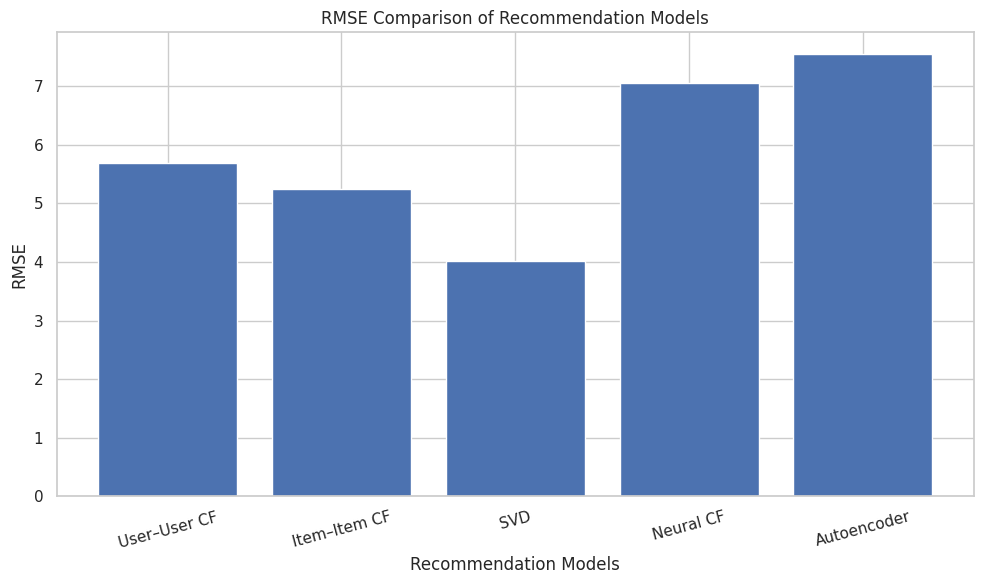

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.xlabel("Recommendation Models")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Recommendation Models")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Model Deployment

In [ ]:
!pip install streamlit pyngrok scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 132.4 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554984 sha256=f76df42309e7c26cec49993adc1f3ae6de4c1514b6ccbb9ce67275dda3c0c4f0
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
import pickle

with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd, f)

with open("user_factors.pkl", "wb") as f:
    pickle.dump(user_factors, f)

with open("item_factors.pkl", "wb") as f:
    pickle.dump(item_factors, f)

with open("user_means.pkl", "wb") as f:
    pickle.dump(user_means, f)

with open("user_item_train.pkl", "wb") as f:
    pickle.dump(user_item_train, f)

with open("books.pkl", "wb") as f:
    pickle.dump(dfbooks, f)

books = pd.read_csv("Books.csv")


print("✅ All SVD artifacts saved")

✅ All SVD artifacts saved


In [ ]:
def predict_svd(user_id, book):
    if user_id not in user_item_train.index or book not in user_item_train.columns:
        return None

    u_idx = user_item_train.index.get_loc(user_id)
    b_idx = user_item_train.columns.get_loc(book)

    pred = user_means.iloc[u_idx] + np.dot(
        user_factors[u_idx],
        item_factors[:, b_idx]
    )

    return float(np.clip(pred, 1, 10))


In [ ]:
def top_k_svd(user_id, k=5):
    if user_id not in user_item_train.index:
        return pd.DataFrame()

    u_idx = user_item_train.index.get_loc(user_id)
    scores = user_factors[u_idx] @ item_factors

    rated = user_item_train.iloc[u_idx].values > 0
    scores[rated] = -np.inf

    top_idx = np.argsort(scores)[-k:][::-1]
    isbns = user_item_train.columns[top_idx]

    recs = pd.DataFrame({
        "ISBN": isbns,
        "Predicted Rating": scores[top_idx]
    })

    return recs.merge(
    books[["ISBN", "Book-Title", "Book-Author", "Image-URL-M"]],
    on="ISBN",
    how="left"
)



In [ ]:
import streamlit as st

In [ ]:
!wget -O library.jpg https://images.unsplash.com/photo-1507842217343-583bb7270b66


--2026-01-20 08:57:16--  https://images.unsplash.com/photo-1507842217343-583bb7270b66
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6761495 (6.4M) [image/jpeg]
Saving to: ‘library.jpg’

library.jpg         100%[===================>]   6.45M  --.-KB/s    in 0.05s   

2026-01-20 08:57:16 (137 MB/s) - ‘library.jpg’ saved [6761495/6761495]



Trial

In [ ]:
def top_k_svd(user_id, k=5):
    # ---------------------------
    # CASE 1: User not seen
    # ---------------------------
    if user_id not in user_item_train.index:
        return get_popular_books(k)

    u_idx = user_item_train.index.get_loc(user_id)

    scores = user_factors[u_idx] @ item_factors

    rated = user_item_train.iloc[u_idx].values > 0
    scores[rated] = np.nan

    # Convert to Series for safety
    scores = pd.Series(scores, index=user_item_train.columns)

    # Drop invalid scores
    scores = scores.dropna()

    # ---------------------------
    # CASE 2: No CF candidates left
    # ---------------------------
    if scores.empty:
        return get_popular_books(k)

    top_items = scores.sort_values(ascending=False).head(k)

    preds = user_means.iloc[u_idx] + top_items.values
    preds = np.clip(preds, 1, 10)

    recs = pd.DataFrame({
        "ISBN": top_items.index,
        "Predicted Rating": preds
    })

    return recs.merge(books, on="ISBN")


In [ ]:
 def get_popular_books(k=5):
    popular = (
        user_item_train
        .replace(0, np.nan)
        .count()
        .sort_values(ascending=False)
        .head(k)
        .index
    )

    recs = pd.DataFrame({
        "ISBN": popular,
        "Predicted Rating": ["Popular"] * len(popular)
    })

    return recs.merge(books, on="ISBN")


In [ ]:
@st.cache_resource
def build_anchor_books():
    # Top 200 most-rated books in training matrix
    counts = (
        user_item_train
        .replace(0, np.nan)
        .count()
        .sort_values(ascending=False)
        .head(200)
    )
    return counts.index.tolist()

ANCHOR_BOOKS = build_anchor_books()


2026-01-20 08:57:16.469 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# ---------------------------
# VALID USERS (GUARANTEED PERSONALIZATION)
# ---------------------------
@st.cache_resource
def get_valid_users():
    # Users with at least 1 rating
    valid_users = user_item_train[user_item_train.sum(axis=1) > 0].index.tolist()
    return valid_users

VALID_USERS = get_valid_users()


2026-01-20 08:57:16.482 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np


# =========================
# PAGE CONFIG
# =========================
st.set_page_config(
    page_title="Book Recommendation System",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# =========================
# STYLE
# =========================
st.markdown("""
<style>
/* ===== GLOBAL BACKGROUND ===== */
.stApp {
    background: linear-gradient(
        rgba(14,17,23,0.88),
        rgba(14,17,23,0.88)
    ),
    url("https://images.unsplash.com/photo-1524995997946-a1c2e315a42f");
    background-size: cover;
    background-position: center;
    background-attachment: fixed;
    color: #FFFFFF;
}

/* ===== GLASS CONTAINER ===== */
.block-container {
    background: rgba(20, 20, 20, 0.75);
    backdrop-filter: blur(12px);
    border-radius: 18px;
    padding: 2.5rem;
    margin-top: 1.5rem;
}

/* ===== HEADINGS ===== */
h1 {
    font-size: 3rem;
    font-weight: 800;
}
h3 {
    margin-top: 2rem;
}

/* ===== BUTTON ===== */
.stButton>button {
    background: linear-gradient(135deg, #E50914, #B20710);
    color: white;
    border-radius: 10px;
    height: 3.2em;
    font-size: 16px;
    border: none;
    box-shadow: 0 6px 20px rgba(229,9,20,0.4);
    transition: transform 0.2s ease;
}
.stButton>button:hover {
    transform: scale(1.05);
}

/* ===== SELECT & SLIDER ===== */
div[data-baseweb="select"] > div {
    background-color: #1f1f1f;
    border-radius: 8px;
}
.stSlider > div {
    color: white;
}

/* ===== BOOK CARD ===== */
.book-card {
    text-align: center;
    transition: transform 0.3s ease, box-shadow 0.3s ease;
}
.book-card:hover {
    transform: scale(1.08);
    box-shadow: 0 15px 40px rgba(0,0,0,0.6);
}

/* ===== BOOK TEXT ===== */
.book-title {
    font-size: 14px;
    font-weight: bold;
    margin-top: 8px;
}
.book-author {
    font-size: 12px;
    color: #b3b3b3;
}

/* ===== IMAGE ROUNDING ===== */
img {
    border-radius: 10px;
}
</style>
""", unsafe_allow_html=True)

# =========================
# TITLE
# =========================
st.markdown(
    "<h1 style='text-align:center;'>📚 Book Recommendation System</h1>",
    unsafe_allow_html=True
)
st.markdown(
    "<p style='text-align:center;color:#b3b3b3;'>SVD-based Collaborative Filtering</p>",
    unsafe_allow_html=True
)

# =========================
# LOAD MODEL
# =========================
@st.cache_resource
def load_model():
    user_factors = pickle.load(open("user_factors.pkl", "rb"))
    item_factors = pickle.load(open("item_factors.pkl", "rb"))
    user_means = pickle.load(open("user_means.pkl", "rb"))
    user_item_train = pickle.load(open("user_item_train.pkl", "rb"))
    books = pd.read_csv("Books.csv")
    return user_factors, item_factors, user_means, user_item_train, books

user_factors, item_factors, user_means, user_item_train, books = load_model()

# =========================
# INPUTS
# =========================
# Only books that exist in SVD training data
valid_isbns = set(user_item_train.columns)

book_list = (
    books[books["ISBN"].isin(valid_isbns)]["Book-Title"]
    .dropna()
    .sort_values()
    .unique()
)


selected_book = st.selectbox("Select a book you like", book_list)
top_n = st.slider("Number of Recommendations", 5, 20, 10)

# =========================
# MAP BOOK → USER
# =========================
def get_user_from_book(book_title):
    match = books[books["Book-Title"] == book_title]
    if match.empty:
        return None

    isbn = match.iloc[0]["ISBN"]
    if isbn not in user_item_train.columns:
        return None

    users = user_item_train[user_item_train[isbn] > 0].index
    return users[0] if len(users) > 0 else None

# =========================
# SVD RECOMMENDER
# =========================
def top_k_similar_books(book_title, k=10):
    match = books[books["Book-Title"] == book_title]

    if match.empty:
        return None

    isbn = match.iloc[0]["ISBN"]

    # Safety check
    if isbn not in user_item_train.columns:
        return None

    b_idx = user_item_train.columns.get_loc(isbn)

    # Dot-product similarity in latent space
    scores = item_factors.T @ item_factors[:, b_idx]
    scores = pd.Series(scores, index=user_item_train.columns)

    # Remove the selected book itself
    scores.loc[isbn] = -np.inf

    top_items = scores.sort_values(ascending=False).head(k)

    recs = pd.DataFrame({
        "ISBN": top_items.index,
        "Score": top_items.values
    })

    recs = recs.merge(
        books[["ISBN", "Book-Title", "Book-Author", "Image-URL-M"]],
        on="ISBN",
        how="left"
    )

    return recs.dropna(subset=["Book-Title"])



# =========================
# RECOMMEND BUTTON
# =========================
if st.button("🎯 Recommend Books"):

    st.session_state.recs = top_k_similar_books(selected_book, top_n)

    if st.session_state.recs is None or st.session_state.recs.empty:
        st.warning("No recommendations available for this book.")
        st.session_state.recs = None

# =========================
# DISPLAY RECOMMENDATIONS
# =========================
if st.session_state.recs is not None:
    st.markdown(
        f"<h3>Because you liked <span style='color:#E50914'>{selected_book}</span></h3>",
        unsafe_allow_html=True
    )

    cols = st.columns(5)

    for i, row in st.session_state.recs.iterrows():
        with cols[i % 5]:
            st.markdown("<div class='book-card'>", unsafe_allow_html=True)

            if pd.notna(row["Image-URL-M"]):
                st.image(row["Image-URL-M"], use_container_width=True)
            else:
                st.image(
                    "https://via.placeholder.com/150x220?text=No+Image",
                    use_container_width=True
                )

            st.markdown(
                f"<div class='book-title'>{row['Book-Title']}</div>",
                unsafe_allow_html=True
            )
            st.markdown(
                f"<div class='book-author'>{row['Book-Author']}</div>",
                unsafe_allow_html=True
            )

            st.markdown("</div>", unsafe_allow_html=True)


Overwriting app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("36WtFUwLyldVBtDVa0BLvSykPyC_3tuWt635YMQeb8SuTAQhy")

# Kill any running ngrok tunnels
ngrok.kill()

public_url = ngrok.connect(8501)
print("🚀 Streamlit app live at:", public_url)

🚀 Streamlit app live at: NgrokTunnel: "https://stanford-nestable-dyan.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
# ngrok.kill()
